# CRI iAtlas notebooks
## Exploring a gene of interest in the iAtlas datasets

Repo: https://github.com/CRI-iAtlas/iatlas-notebooks/ 

Notebook: explore_gene_of_interest.ipynb 

Date: July 12, 2024 

Author: Carolina Heimann

---

notebook repo: https://github.com/CRI-iAtlas/iatlas-notebooks

landing page: https://www.cri-iatlas.org/

portal: https://isb-cgc.shinyapps.io/iatlas/

email: support@cri-iatlas.org

---

## Getting started

In [14]:
# We have a few libraries to install.
try({
    packages = c("magrittr", "dplyr", "tidyr", "dplyr", "tidyr", "ggplot2", "iatlasGraphQLClient", "ggpubr")

    sapply(packages, function(x) {
      if (!require(x,character.only = TRUE))
        install.packages(x)
        suppressPackageStartupMessages(library(x,character.only = TRUE))
    })},
    silent=TRUE 
)

# helper functions
# git clone the notebook repo to get this file #
# or see: https://github.com/CRI-iAtlas/iatlas-notebooks/blob/main/functions/notebook_functions.R
source('functions/notebook_functions.R')

Loading required package: ggpubr



$magrittr
 [1] "iatlasGraphQLClient" "ggplot2"             "tidyr"              
 [4] "dplyr"               "magrittr"            "stats"              
 [7] "graphics"            "grDevices"           "utils"              
[10] "datasets"            "methods"             "base"               

$dplyr
 [1] "iatlasGraphQLClient" "ggplot2"             "tidyr"              
 [4] "dplyr"               "magrittr"            "stats"              
 [7] "graphics"            "grDevices"           "utils"              
[10] "datasets"            "methods"             "base"               

$tidyr
 [1] "iatlasGraphQLClient" "ggplot2"             "tidyr"              
 [4] "dplyr"               "magrittr"            "stats"              
 [7] "graphics"            "grDevices"           "utils"              
[10] "datasets"            "methods"             "base"               

$dplyr
 [1] "iatlasGraphQLClient" "ggplot2"             "tidyr"              
 [4] "dplyr"               "magrittr"            "stats"              
 [7] "graphics"            "grDevices"           "utils"              
[10] "datasets"            "methods"             "base"               

$tidyr
 [1] "iatlasGraphQLClient" "ggplot2"             "tidyr"              
 [4] "dplyr"               "magrittr"            "stats"              
 [7] "graphics"            "grDevices"           "utils"              
[10] "datasets"            "methods"             "base"               

$ggplot2
 [1] "iatlasGraphQLClient" "ggplot2"             "tidyr"              
 [4] "dplyr"               "magrittr"            "stats"              
 [7] "graphics"            "grDevices"           "utils"              
[10] "datasets"            "methods"             "base"               

$iatlasGraphQLClient
 [1] "iatlasGraphQLClient" "ggplot2"             "tidyr"              
 [4] "dplyr"               "magrittr"            "stats"              
 [7] "graphics"            "grDevices"           "utils"              
[10] "datasets"            "methods"             "base"               

$ggpubr
 [1] "ggpubr"              "iatlasGraphQLClient" "ggplot2"            
 [4] "tidyr"               "dplyr"               "magrittr"           
 [7] "stats"               "graphics"            "grDevices"          
[10] "utils"               "datasets"            "methods"            
[13] "base"

In [2]:
#making sure we are querying the production version of the iAtlas database
.GlobalEnv$API_URL <- "https://api.cri-iatlas.org/api"

# Exploring the iAtlas datasets


The iAtlas ICI data is stored in a database that can be queried with functions from the `iatlasGraphQLClient` package. 
We have clinical data, immune features, scores of predictors of response to immunotherapy, and quantile normalized gene expression.

As a first step, let's take a look at the available datasets.

## Datasets available

In [3]:
#getting ICI data
#datasets that we have in the iAtlas database
datasets <- iatlasGraphQLClient::query_datasets()
datasets

display,name,type
<chr>,<chr>,<chr>
"Chen 2016 - SKCM, Anti-CTLA4",Chen_CanDisc_2016,ici
"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici
GTEX,GTEX,other
"Gide 2019 - SKCM, PD-1 +/- CTLA4",Gide_Cell_2019,ici
"Hugo 2016 - SKCM, PD-1",HugoLo_IPRES_2016,ici
"IMVigor210 - BLCA, PD-L1",IMVigor210,ici
"IMmotion150 - KIRC, PD-L1",IMmotion150,ici
"Kim 2018 - STAD, PD-1",Kim_NatMed_2018,ici
"Liu 2019 - SKCM, PD-1",Liu_NatMed_2019,ici


The display name of the datasets makes reference to the publication associated with the data, and also summarises the tumor type and ICI target involved in the study.

## Selecting gene of interest

The genes that are available for analysis in iAtlas can be summarized in a table by the following query:

In [4]:
#genes that we have expression data for all samples in the ici datasets (we will query expression values in the next section)
genes_df <- iatlasGraphQLClient::query_genes(cohorts = datasets$name)
head(genes_df)

hgnc,entrez,description,friendly_name,io_landscape_name,gene_family,gene_function,immune_checkpoint,pathway,super_category
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ABCB5,340273,"A protein highly expressed by melanoma cell, and it is also in the family of ABC transporter and P-glycoprotein family.",NA,ABCB5,NA,NA,NA,ABC-family proteins mediated transport,NA
ABCC1,4363,MRP1 is a membrane transporter and it allows tumor cells to transport many chemotherapeutic compounds out of cancer cells.,NA,MRP1,NA,NA,NA,ABC-family proteins mediated transport,NA
ACKR3,57007,CXCR7 is the receptor for chemokines CXCL11 and CXCL12.,NA,CXCR7,NA,NA,NA,Chemokine signaling pathway,NA
ACP3,55,A enzyme produced by the prostate and generally is elevated in men with prostate cancer.,NA,ACPP,NA,NA,NA,Innate Immune System,NA
ADAM17,6868,Belongs to metallopeptidase family and help the maturation of TNF.,NA,ADAM17,NA,NA,NA,Metallopeptidase,NA
ADAM9,8754,Belongs to metallopeptidase family.,NA,ADAM9,NA,NA,NA,Metallopeptidase,NA


In this notebook, we will explore everything we can analyze in association with the gene PD-L1. In iAtlas, the PD-L1 name is annotated as a friendly name, and queries to get expression values require the entrez ID of the gene.  

In [5]:
dplyr::filter(genes_df, friendly_name == "PD-L1")

hgnc,entrez,description,friendly_name,io_landscape_name,gene_family,gene_function,immune_checkpoint,pathway,super_category
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD274,29126,"PD-L1 is the major ligand to PD-1 and it is highly expressed by cancer cells and other immune cells, especially macrophages and dendritic cells. Inhibiting PD-L1 is a viable method to unleash the anti-tumor immunity of T cells and a few drugs against this target have been approved.",PD-L1,PD-L1,B7/CD28,NA,Inhibitory,T-Cell antigen Receptor (TCR) Signaling Pathway,Co-inhibitor


We can then use the entrez ID to query the database for expression values for all samples. In this first moment, we will focus on bulk RNA seq values

In [6]:
pdl1_bulk_rna_seq  <- iatlasGraphQLClient::query_gene_expression(cohorts = datasets$name, entrez = 29126)
head(pdl1_bulk_rna_seq)

sample,entrez,hgnc,rna_seq_expr
<chr>,<int>,<chr>,<dbl>
Chen_CanDisc_2016-c05-ar-c05_pre,29126,CD274,NA
Chen_CanDisc_2016-c06-ar-c06_on,29126,CD274,NA
Chen_CanDisc_2016-c07-ar-c07_pre,29126,CD274,NA
Chen_CanDisc_2016-c08-ar-c08_pre,29126,CD274,NA
Chen_CanDisc_2016-c09-ar-c09_pre,29126,CD274,NA
Chen_CanDisc_2016-c10-ar-c10_pre,29126,CD274,NA


If you are wondering why there are NAs values in the rna_seq_expr in this table, it is because these samples come from a dataset that has only Nanostring data. We can make this table more useful by deleting the samples that have NAs values for bulk RNA expression, and adding an extra column with a flag of the dataset of origin.

In [7]:
pdl1_bulk_rna_seq  <- pdl1_bulk_rna_seq %>%
    dplyr::filter(!is.na(rna_seq_expr)) %>%
    #we now query the database to get a table with sample-dataset associations, and then join it with gene expression
    dplyr::inner_join(iatlasGraphQLClient::query_dataset_samples(datasets = datasets$name),  
                    by = dplyr::join_by(sample == sample_name))

head(pdl1_bulk_rna_seq)

sample,entrez,hgnc,rna_seq_expr,dataset_display,dataset_name,dataset_type
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
Choueiri_CCR_2016-p014-ar-325,29126,CD274,187.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici
Choueiri_CCR_2016-p018-ar-318,29126,CD274,68.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici
Choueiri_CCR_2016-p021-ar-301,29126,CD274,448.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici
Choueiri_CCR_2016-p027-ar-866,29126,CD274,106.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici
Choueiri_CCR_2016-p041-ar-306,29126,CD274,319.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici
Choueiri_CCR_2016-p050-ar-551,29126,CD274,159.001,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici


# Question 01: How does the distribution of PD-L1 expression vary across different tumor types?

To get this information, we will need to gather the clinical annotation for the samples, and then use it for plotting.

In [8]:
#clinical annotation that is available for the datasets with bulk RNA-seq expression for PD-L1
clinical_options <- iatlasGraphQLClient::query_tags(datasets = unique(pdl1_bulk_rna_seq$dataset_name))
clinical_options

tag_name,tag_long_display,tag_short_display,tag_characteristics,tag_color,tag_order,tag_type
<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>
Biopsy_Site,Biopsy Site,Biopsy Site,Site where sample was collected from.,NA,18,parent_group
Cancer_Tissue,Cancer Tissue,Cancer Tissue,Original tumor tissue.,NA,14,parent_group
Clinical_Benefit,Clinical Benefit,Clinical Benefit,Patients have clinical benefit when mRECIST response is different than Progressive Disease.,NA,4,parent_group
Clinical_Stage,Clinical Stage,Clinical Stage,Clinical stage of cancer.,NA,17,parent_group
FFPE,FFPE Samples,FFPE Samples,Indicates whether the sample is FFPE or not.,NA,20,parent_group
ICI_Pathway,ICI Pathway,ICI Pathway,Pathway that is being targeted by the ICI treatment.,NA,6,parent_group
ICI_Rx,Drug,Drug,"Drug used for the treatment. Combination therapies, where more than one drug is administered, are represented by the name of both drugs.",NA,5,parent_group
ICI_Target,Target,Target,What is the target of the ICI drug.,NA,7,parent_group
Immune_Subtype,Immune Subtype,Immune Subtype,NA,NA,NA,parent_group


To answer this question, we'll need the annotation for the "TCGA_Study" category.

In [9]:
question1_df  <- pdl1_bulk_rna_seq %>%
    dplyr::inner_join(
        (iatlasGraphQLClient::query_tag_samples_parents(samples = pdl1_bulk_rna_seq$sample,parent_tags = "TCGA_Study")%>%
         dplyr::select(sample_name, tag_name, tag_long_display, tag_short_display)),
        by = dplyr::join_by(sample == sample_name)
    )

head(question1_df)

sample,entrez,hgnc,rna_seq_expr,dataset_display,dataset_name,dataset_type,tag_name,tag_long_display,tag_short_display
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Choueiri_CCR_2016-p014-ar-325,29126,CD274,187.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,KIRC,Kidney renal clear cell carcinoma,KIRC
Choueiri_CCR_2016-p018-ar-318,29126,CD274,68.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,KIRC,Kidney renal clear cell carcinoma,KIRC
Choueiri_CCR_2016-p021-ar-301,29126,CD274,448.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,KIRC,Kidney renal clear cell carcinoma,KIRC
Choueiri_CCR_2016-p027-ar-866,29126,CD274,106.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,KIRC,Kidney renal clear cell carcinoma,KIRC
Choueiri_CCR_2016-p041-ar-306,29126,CD274,319.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,KIRC,Kidney renal clear cell carcinoma,KIRC
Choueiri_CCR_2016-p050-ar-551,29126,CD274,159.001,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,KIRC,Kidney renal clear cell carcinoma,KIRC


Warning message in FUN(X[[i]], ...):
"NaNs produced"
Warning message in FUN(X[[i]], ...):
"NaNs produced"
Warning message:
"Removed 51 rows containing non-finite values (`stat_boxplot()`)."


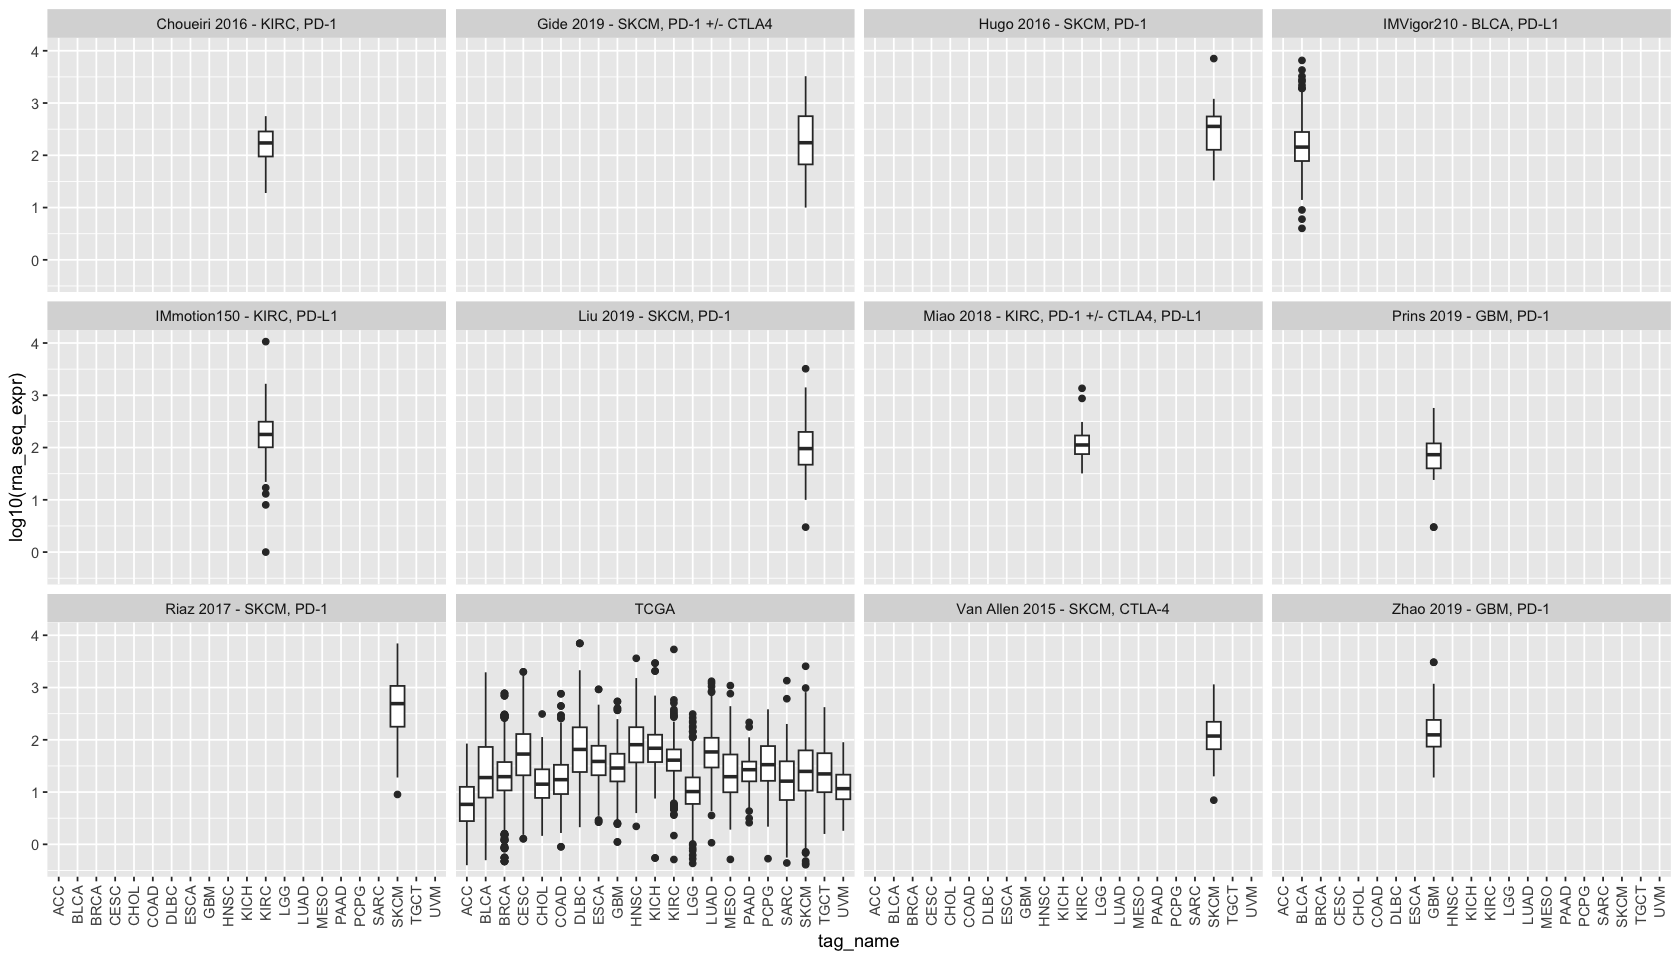

In [19]:
#now we can plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot2::ggplot(question1_df, aes(x = tag_name, y = log10(rna_seq_expr)))+
        ggplot2::geom_boxplot()+
        ggplot2::facet_wrap(~dataset_display)+ 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

# Question 02: How does expression vary with time?

A few of the datasets have paired samples, taken before and during/after treatment. We can select the datasets that have this annotation and compare PD-L1 expression across timepoints.


In [11]:
question2_df  <- pdl1_bulk_rna_seq %>%
    dplyr::inner_join(
        (iatlasGraphQLClient::query_tag_samples_parents(samples = pdl1_bulk_rna_seq$sample,parent_tags = "Sample_Treatment")%>%
         dplyr::select(sample_name, tag_name, tag_long_display, tag_short_display)),
        by = dplyr::join_by(sample == sample_name)
    )

head(question2_df)

sample,entrez,hgnc,rna_seq_expr,dataset_display,dataset_name,dataset_type,tag_name,tag_long_display,tag_short_display
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Choueiri_CCR_2016-p014-ar-325,29126,CD274,187.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment
Choueiri_CCR_2016-p018-ar-318,29126,CD274,68.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment
Choueiri_CCR_2016-p021-ar-301,29126,CD274,448.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment
Choueiri_CCR_2016-p027-ar-866,29126,CD274,106.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment
Choueiri_CCR_2016-p041-ar-306,29126,CD274,319.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment
Choueiri_CCR_2016-p050-ar-551,29126,CD274,159.001,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment


Warning message:
"Removed 10 rows containing non-finite values (`stat_boxplot()`)."


Warning message:
"Removed 10 rows containing non-finite values (`stat_compare_means()`)."
Warning message:
"Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default"
Warning message:
"Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default"
Warning message:
"Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default"
Warning message:
"Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default"
Warning message:
"Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default"
Warning message:
"Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default"
Warning message:
"Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default"


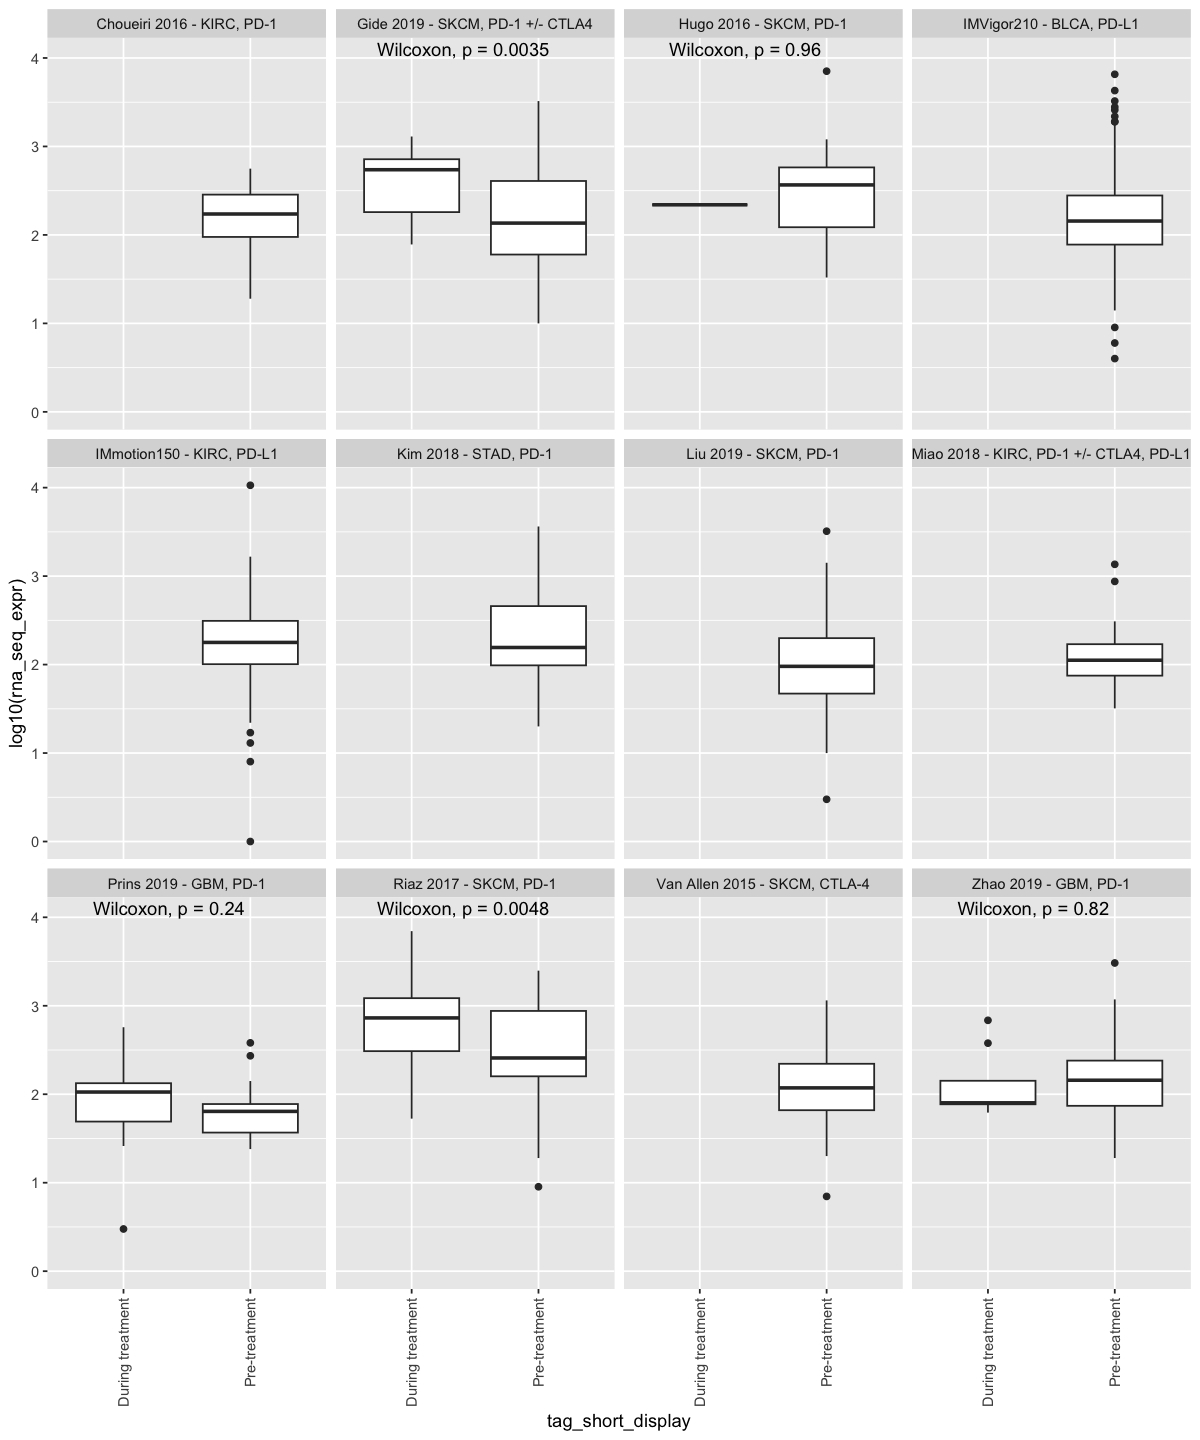

In [21]:
options(repr.plot.width=10, repr.plot.height=12)
ggplot2::ggplot(question2_df, aes(x = tag_short_display, y = log10(rna_seq_expr)))+

        ggplot2::geom_boxplot()+
        ggplot2::facet_wrap(~dataset_display)+ 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
        stat_compare_means()

# Question 03: How does PD-L1 expression vary with time in Responders and Non-Responders?

In this case, we will make use of two different types of clinical annotation. We will make use of the data frame we used for the question above and add and combine the annotation of Response to ICI.

In [23]:
question3_df  <- question2_df %>%
    dplyr::inner_join(
        (iatlasGraphQLClient::query_tag_samples_parents(samples = question2_df$sample,parent_tags = "Responder")%>%
         dplyr::select(sample_name, tag_name, tag_long_display, tag_short_display)),
        by = dplyr::join_by(sample == sample_name)
    ) %>%
    dplyr::mutate(
        group = paste(tag_short_display.y, tag_short_display.x,sep = " & ")
    )

head(question3_df)

sample,entrez,hgnc,rna_seq_expr,dataset_display,dataset_name,dataset_type,tag_name.x,tag_long_display.x,tag_short_display.x,tag_name.y,tag_long_display.y,tag_short_display.y,group
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Choueiri_CCR_2016-p014-ar-325,29126,CD274,187.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,true_responder,Responder,Responder,Responder & Pre-treatment
Choueiri_CCR_2016-p018-ar-318,29126,CD274,68.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment
Choueiri_CCR_2016-p021-ar-301,29126,CD274,448.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment
Choueiri_CCR_2016-p027-ar-866,29126,CD274,106.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment
Choueiri_CCR_2016-p041-ar-306,29126,CD274,319.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment
Choueiri_CCR_2016-p050-ar-551,29126,CD274,159.001,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment


Warning message:
"Removed 10 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 10 rows containing non-finite values (`stat_compare_means()`)."


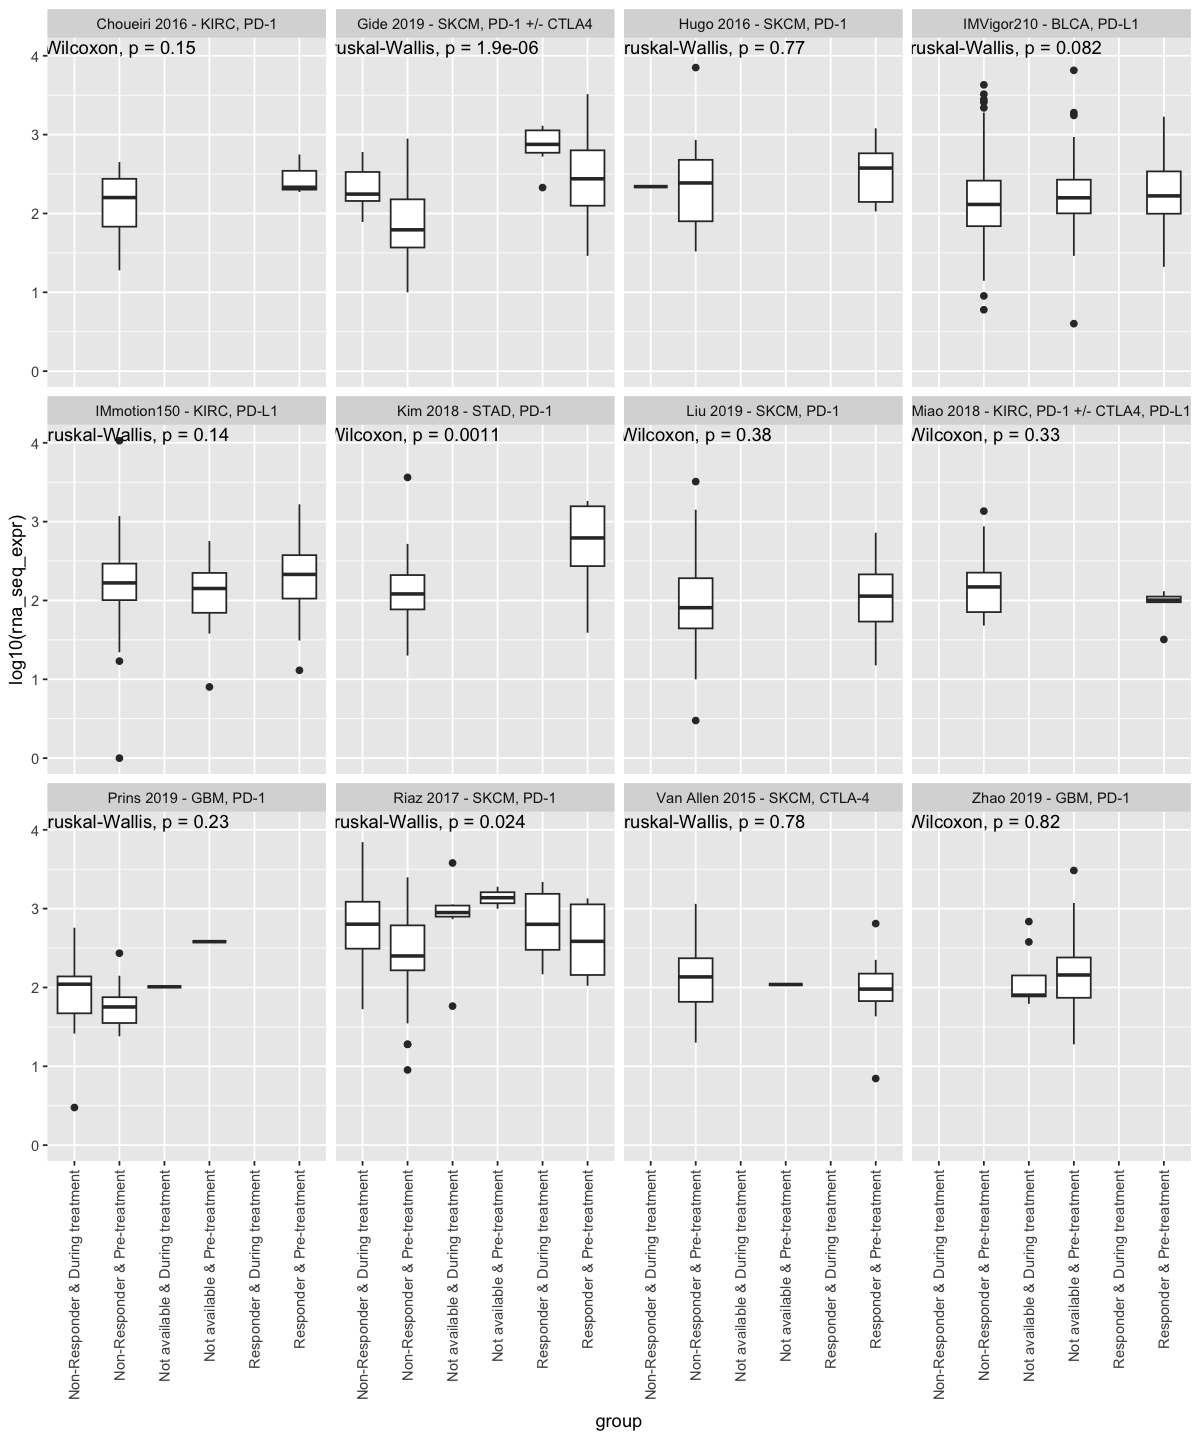

In [24]:
options(repr.plot.width=10, repr.plot.height=12)
ggplot2::ggplot(question3_df, aes(x = group, y = log10(rna_seq_expr)))+
        ggplot2::geom_boxplot()+
        ggplot2::facet_wrap(~dataset_display)+ 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
        stat_compare_means()

# Question 04: How does PD-L1 expression correlate with T-cell estimates for Responders and Non-Responders?

Immune features, such as estimates for T-cell, can be retrieved by the `iatlasGraphQLClient::query_feature_values()` function. First, for a summary of other immune features, let's get a table summarizing the available options.

In [32]:
features_df <- iatlasGraphQLClient::query_features()
head(features_df)

name,display,class,order,unit,method_tag
<chr>,<chr>,<chr>,<int>,<chr>,<chr>
Senbabaoglu_APM1,APM1,TCGA_Germline,NA,NA,NA
Senbabaoglu_APM2,APM2,TCGA_Germline,NA,NA,NA
AS,Aneuploidy Score,DNA Alteration,5,NA,CNVR-DDR
Senbabaoglu_Angiogenesis,Angiogenesis,TCGA_Germline,NA,NA,NA
B_cells_Aggregate2,B Cells,Immune Cell Proportion - Common Lymphoid and Myeloid Cell Derivative Class,3,Fraction,CIBERSORT
B_cells_Aggregate3,B Cells,Immune Cell Proportion - Differentiated Lymphoid and Myeloid Cell Derivative Class,4,Fraction,CIBERSORT


In [28]:
# we want T cell estimates from CIBERSORT, let's filter the table to see the available options
features_df %>%
    dplyr::filter(method_tag == "CIBERSORT")

name,display,class,order,unit,method_tag
<chr>,<chr>,<chr>,<int>,<chr>,<chr>
B_cells_Aggregate2,B Cells,Immune Cell Proportion - Common Lymphoid and Myeloid Cell Derivative Class,3,Fraction,CIBERSORT
B_cells_Aggregate3,B Cells,Immune Cell Proportion - Differentiated Lymphoid and Myeloid Cell Derivative Class,4,Fraction,CIBERSORT
B_cells_memory,B Cells Memory,Immune Cell Proportion - Original,9,Fraction,CIBERSORT
B_cells_naive,B Cells Naive,Immune Cell Proportion - Original,8,Fraction,CIBERSORT
Dendritic_cells_Aggregate1,Dendritic Cells,Immune Cell Proportion - Multipotent Progenitor Cell Derivative Class,3,Fraction,CIBERSORT
Dendritic_cells_Aggregate3,Dendritic Cells,Immune Cell Proportion - Differentiated Lymphoid and Myeloid Cell Derivative Class,8,Fraction,CIBERSORT
Dendritic_cells_Aggregate2,Dendritic Cells,Immune Cell Proportion - Common Lymphoid and Myeloid Cell Derivative Class,6,Fraction,CIBERSORT
Dendritic_cells_activated,Dendritic Cells Activated,Immune Cell Proportion - Original,18,Fraction,CIBERSORT
Dendritic_cells_resting,Dendritic Cells Resting,Immune Cell Proportion - Original,17,Fraction,CIBERSORT


In [37]:
question4_df  <- question3_df %>%
    dplyr::inner_join(
        (iatlasGraphQLClient::query_feature_values(cohorts = unique(pdl1_bulk_rna_seq$dataset_name), features = "T_cells_CD8")%>%
         dplyr::select(sample, feature_name, feature_display, feature_value)),
        by = dplyr::join_by(sample)
    )

head(question4_df)

sample,entrez,hgnc,rna_seq_expr,dataset_display,dataset_name,dataset_type,tag_name.x,tag_long_display.x,tag_short_display.x,tag_name.y,tag_long_display.y,tag_short_display.y,group,feature_name,feature_display,feature_value
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Choueiri_CCR_2016-p014-ar-325,29126,CD274,187.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,true_responder,Responder,Responder,Responder & Pre-treatment,T_cells_CD8,T Cells CD8,0.04161291
Choueiri_CCR_2016-p018-ar-318,29126,CD274,68.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,T_cells_CD8,T Cells CD8,0.07718584
Choueiri_CCR_2016-p021-ar-301,29126,CD274,448.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,T_cells_CD8,T Cells CD8,0.00000000
Choueiri_CCR_2016-p027-ar-866,29126,CD274,106.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,T_cells_CD8,T Cells CD8,0.00000000
Choueiri_CCR_2016-p041-ar-306,29126,CD274,319.000,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,T_cells_CD8,T Cells CD8,0.35983002
Choueiri_CCR_2016-p050-ar-551,29126,CD274,159.001,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,T_cells_CD8,T Cells CD8,0.38264381


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 10 rows containing non-finite values (`stat_smooth()`)."


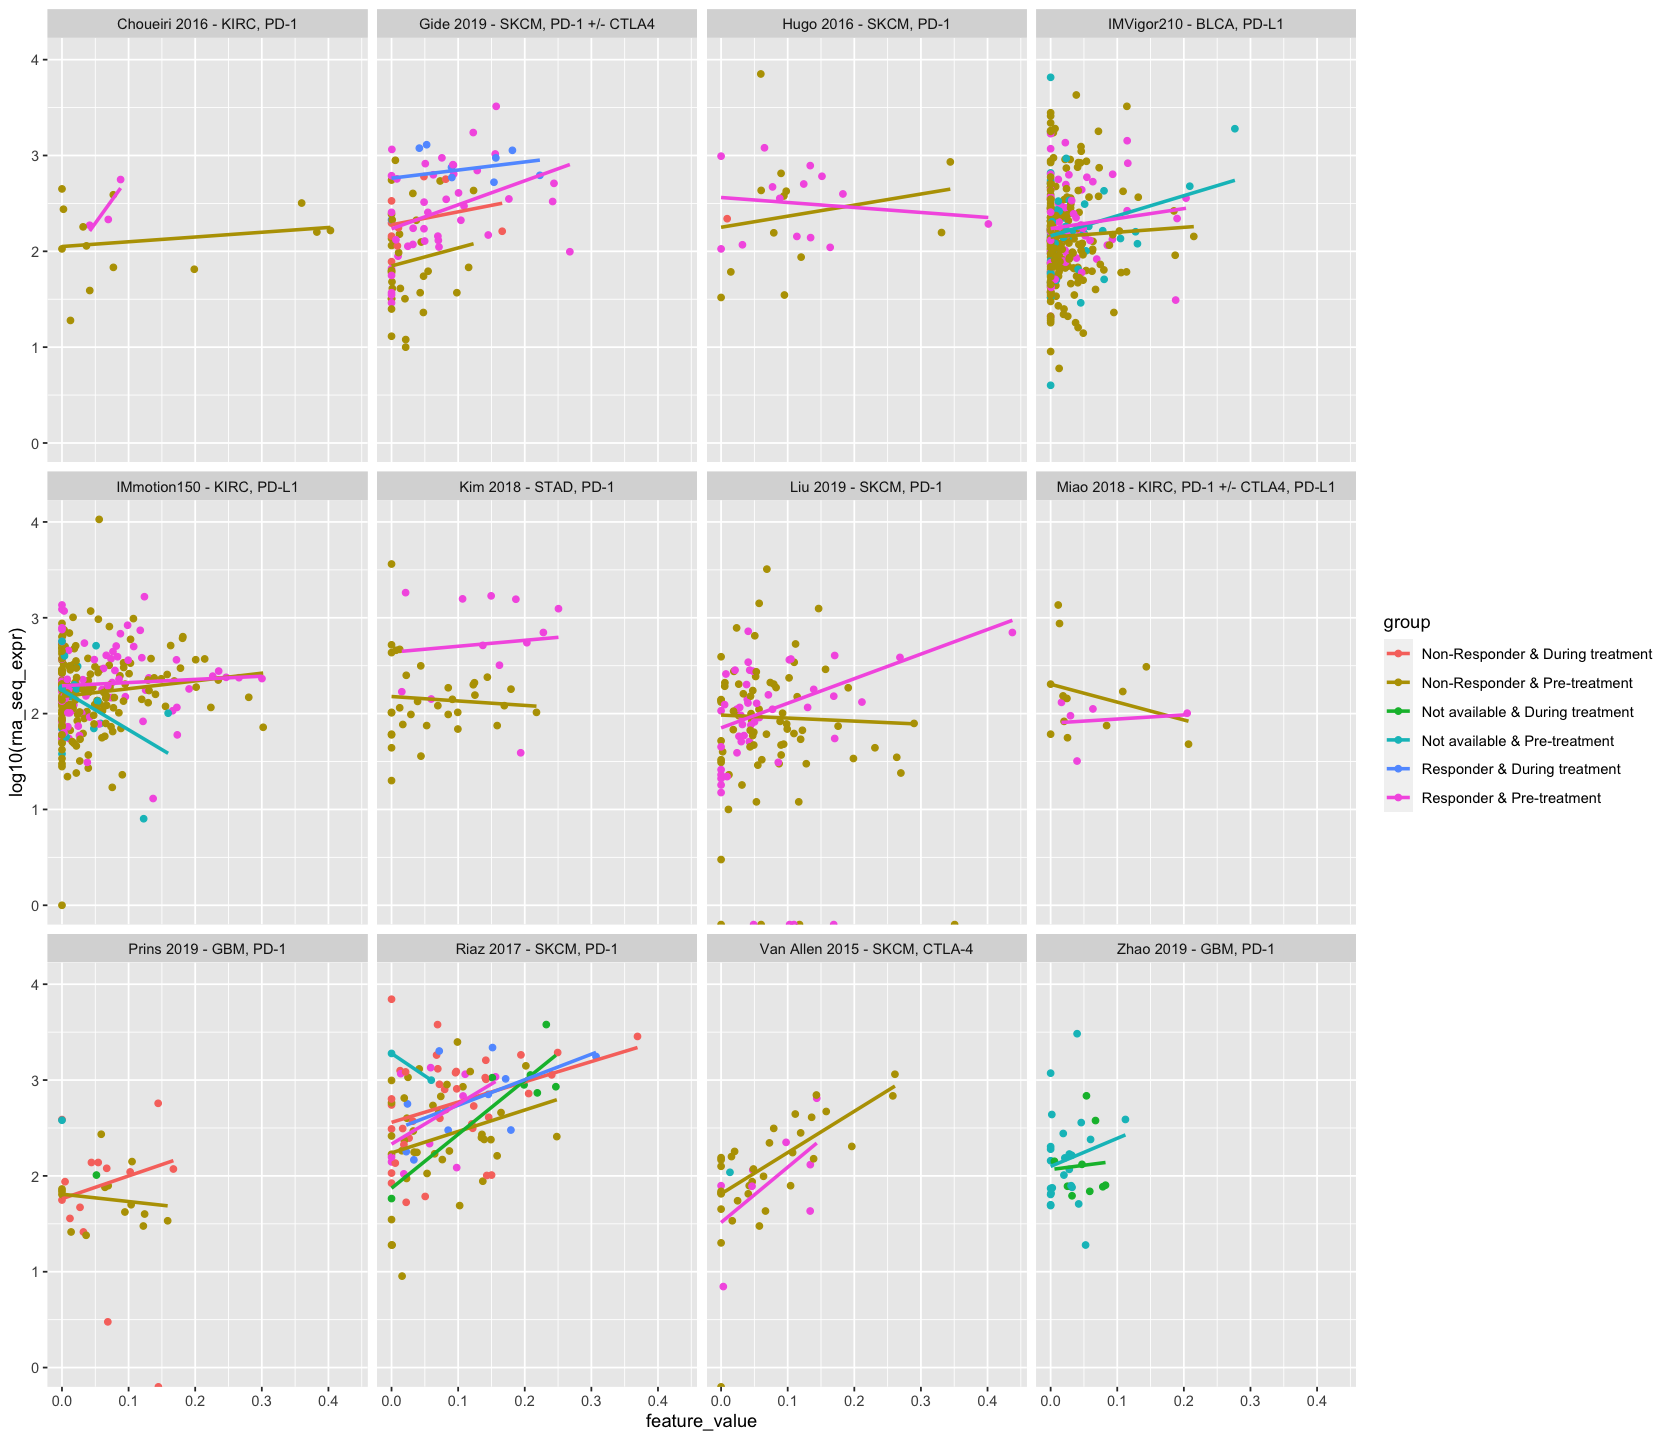

In [39]:
options(repr.plot.width=14, repr.plot.height=12)
ggplot2::ggplot(question4_df, aes(x = feature_value, y = log10(rna_seq_expr), color = group))+
        ggplot2::geom_point()+
        ggplot2::facet_wrap(~dataset_display)+
        ggplot2::geom_smooth(method = "lm", se = FALSE)  
        #theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
        #stat_compare_means()

# Question 05: How does PD-L1 expression correlate with survival?

Survival data is also retrievable with the `iatlasGraphQLClient::query_feature_values()` function.

In [49]:
#unique(features_df$class)
dplyr::filter(features_df, class %in% c("Survival Status", "Survival Time"))

name,display,class,order,unit,method_tag
<chr>,<chr>,<chr>,<int>,<chr>,<chr>
OS,OS,Survival Status,NA,NA,Survival
OS_time,OS Time,Survival Time,NA,NA,Survival
PFI_1,PFI,Survival Status,NA,NA,Survival
PFI_time_1,PFI Time,Survival Time,NA,NA,Survival


In [51]:
question5_df  <- question3_df %>%
    dplyr::inner_join(
        (iatlasGraphQLClient::query_feature_values(cohorts = unique(pdl1_bulk_rna_seq$dataset_name), 
                                                   features = c("OS", "OS_time"))%>%
         dplyr::select(sample, feature_name, feature_display, feature_value)),
        by = dplyr::join_by(sample)
    )

head(question5_df)

sample,entrez,hgnc,rna_seq_expr,dataset_display,dataset_name,dataset_type,tag_name.x,tag_long_display.x,tag_short_display.x,tag_name.y,tag_long_display.y,tag_short_display.y,group,feature_name,feature_display,feature_value
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Choueiri_CCR_2016-p014-ar-325,29126,CD274,187,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,true_responder,Responder,Responder,Responder & Pre-treatment,OS,OS,0
Choueiri_CCR_2016-p014-ar-325,29126,CD274,187,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,true_responder,Responder,Responder,Responder & Pre-treatment,OS_time,OS Time,1025
Choueiri_CCR_2016-p018-ar-318,29126,CD274,68,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,OS,OS,0
Choueiri_CCR_2016-p018-ar-318,29126,CD274,68,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,OS_time,OS Time,111
Choueiri_CCR_2016-p021-ar-301,29126,CD274,448,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,OS,OS,0
Choueiri_CCR_2016-p021-ar-301,29126,CD274,448,"Choueiri 2016 - KIRC, PD-1",Choueiri_CCR_2016,ici,pre_sample_treatment,Pre-treatment,Pre-treatment,false_responder,Non-Responder,Non-Responder,Non-Responder & Pre-treatment,OS_time,OS Time,349
